In [9]:
import fastf1
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.collections import LineCollection
import pandas as pd
import logging
from typing import List, Dict, Any, Optional, Tuple
import fastf1.plotting



In [10]:
class FastFormulaOne:
    
    def __init__(self, year, event, session_type):
        self.session = fastf1.get_session(year, event, session_type)
        self.year = year
        self.laps = self.session.load
        self.session.load()

    def get_schedule(self):
        return fastf1.get_event_schedule(self.year)

    def plot_driver_positions(self, figsize=(8.0, 4.9)):
        fig, ax = plt.subplots(figsize=figsize)

        for drv in self.session.drivers:
            drv_laps = self.session.laps.pick_drivers(drv)
            if drv_laps.empty:
                continue

            abb = drv_laps['Driver'].iloc[0]
            style = fastf1.plotting.get_driver_style(identifier=abb,
                                                     style=['color', 'linestyle'],
                                                     session=self.session)

            ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
                    label=abb, **style)

        ax.set_ylim([20.5, 0.5])
        ax.set_yticks([1, 5, 10, 15, 20])
        ax.set_xlabel('Lap')
        ax.set_ylabel('Position')
        ax.legend(bbox_to_anchor=(1.0, 1.02))
        plt.tight_layout()
        plt.show()

    def top_5_f1_drivers(self):
        return self.session.results['FullName'].head(5)
        

    def plot_driver_telemetry(self, driver, colormap=mpl.cm.plasma):
        weekend = self.session.event
        lap = self.session.laps.pick_drivers(driver).pick_fastest()

        x = lap.telemetry['X']
        y = lap.telemetry['Y']
        color = lap.telemetry['Speed']

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
        fig.suptitle(f'{weekend.name} {self.year} - {driver} - Speed', size=24, y=0.97)

        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
        ax.axis('off')

        ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)

        norm = plt.Normalize(color.min(), color.max())
        lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)
        lc.set_array(color)
        ax.add_collection(lc)

        cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
        normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
        mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")
        plt.show()

    
    def fastest_laps(self):
            laps = self.session.laps
            fastest_laps = laps.pick_fastest() 
            return fastest_laps
          
    def top_team_name(self):
        return self.session.results['TeamName'].head(1)
    
    def analyze_sector_performance(self, drivers_list):
        sector_analysis = {}
        for driver in drivers_list:
            driver_laps = self.session.laps.pick_drivers(driver)
            sector_analysis[driver] = {
                'sector_1': driver_laps['Sector1Time'].mean(),
                'sector_2': driver_laps['Sector2Time'].mean(),
                'sector_3': driver_laps['Sector3Time'].mean()
        }
            return sector_analysis
            
    def lap_count_by_driver(self):
        lap_count = self.session.laps['Driver'].value_counts().to_dict()
        return lap_count
        
    def lowest_lap_count_by_driver(self):
        return self.session.laps['Driver'].value_counts().sort_values(ascending= True).head(1)
     
    def tire_compound_usage(self):
        all_drivers = {}
        drivers = self.session.laps['Driver'].unique().tolist()
        for driver in drivers:
            driver_laps = self.session.laps.pick_drivers(driver)
            all_drivers[driver] = driver_laps['Compound'].value_counts().to_dict()
        return all_drivers
    
        
        
        
    


core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

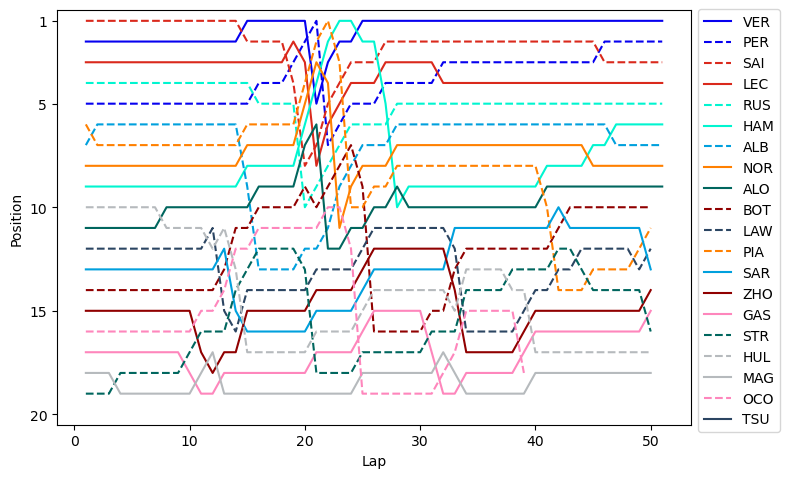

In [11]:
f1 = FastFormulaOne(2023,'Monza','R')
f1.get_schedule()
f1.analyze_sector_performance(f1.session.laps['Driver'].head(5))
f1.lap_count_by_driver()
f1.top_5_f1_drivers()
f1.fastest_laps()
f1.top_team_name()
f1.lowest_lap_count_by_driver
f1.tire_compound_usage()
f1.plot_driver_positions()

In [199]:
session = fastf1.get_session(2022,'Monaco','R')
session.load()
session.laps.pick_drivers('VER')




logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
core        WARNING 	Fixed incorrect tyre stint information for driver '55'
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	Fixed incorrect tyre stint information for driver '16'
core        WARNING 	Fixed incorrect tyre

0
    LapNumber Compound
0         1.0   MEDIUM
1         2.0   MEDIUM
2         3.0   MEDIUM
3         4.0   MEDIUM
4         5.0   MEDIUM
5         6.0   MEDIUM
6         7.0   MEDIUM
7         8.0   MEDIUM
8         9.0   MEDIUM
9        10.0   MEDIUM
10       11.0   MEDIUM
11       12.0   MEDIUM
12       13.0   MEDIUM
13       14.0   MEDIUM
14       15.0   MEDIUM
15       16.0   MEDIUM
16       17.0   MEDIUM
17       18.0   MEDIUM
18       19.0   MEDIUM
19       20.0   MEDIUM
20       21.0     HARD
21       22.0     HARD
22       23.0     HARD
23       24.0     HARD
24       25.0     HARD
25       26.0     HARD
26       27.0     HARD
27       28.0     HARD
28       29.0     HARD
29       30.0     HARD
30       31.0     HARD
31       32.0     HARD
32       33.0     HARD
33       34.0     HARD
34       35.0     HARD
35       36.0     HARD
36       37.0     HARD
37       38.0     HARD
38       39.0     HARD
39       40.0     HARD
40       41.0     HARD
41       42.0     HARD
42       

In [179]:
session.laps.columns


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [174]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps'],
      dtype='object')

In [232]:
session.results[['CountryCode','FullName']]
session.results.groupby('CountryCode').sum()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
CountryCode,,,,,,,,,,,,,,,,,,,,,
AUS,3,D RICCIARDO,RIC,ricciardo,McLaren,f58020,mclaren,Daniel,Ricciardo,Daniel Ricciardo,...,13.0,13,14.0,0 days,0 days,0 days,0 days 00:00:57.635000,Finished,0.0,64.0
CAN,186,L STROLLN LATIFI,STRLAT,strolllatifi,Aston MartinWilliams,2d826d37bedd,aston_martinwilliams,LanceNicholas,StrollLatifi,Lance StrollNicholas Latifi,...,29.0,1415,37.0,0 days,0 days,0 days,0 days 00:01:00.802000,Finished+1 Lap,0.0,127.0
CHN,24,G ZHOU,ZHO,zhou,Alfa Romeo,b12039,alfa,Guanyu,Zhou,Guanyu Zhou,...,16.0,16,20.0,0 days,0 days,0 days,0 days 00:00:00,+1 Lap,0.0,63.0
DEN,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,b6babd,haas,Kevin,Magnussen,Kevin Magnussen,...,20.0,R,13.0,0 days,0 days,0 days,0 days 00:00:00,Water pressure,0.0,19.0
ESP,5514,C SAINZF ALONSO,SAIALO,sainzalonso,FerrariAlpine,ed1c242293d1,ferrarialpine,CarlosFernando,SainzAlonso,Carlos SainzFernando Alonso,...,9.0,27,9.0,0 days,0 days,0 days,0 days 00:00:47.512000,FinishedFinished,24.0,128.0
FIN,77,V BOTTAS,BOT,bottas,Alfa Romeo,b12039,alfa,Valtteri,Bottas,Valtteri Bottas,...,9.0,9,12.0,0 days,0 days,0 days,0 days 00:00:52.525000,Finished,2.0,64.0
FRA,1031,P GASLYE OCON,GASOCO,gaslyocon,AlphaTauriAlpine,4e7c9b2293d1,alphataurialpine,PierreEsteban,GaslyOcon,Pierre GaslyEsteban Ocon,...,23.0,1112,27.0,0 days,0 days,0 days,0 days 00:01:49.933000,FinishedFinished,0.0,128.0
GBR,63444,G RUSSELLL NORRISL HAMILTON,RUSNORHAM,russellnorrishamilton,MercedesMcLarenMercedes,6cd3bff580206cd3bf,mercedesmclarenmercedes,GeorgeLandoLewis,RussellNorrisHamilton,George RussellLando NorrisLewis Hamilton,...,19.0,568,19.0,0 days,0 days,0 days,0 days 00:01:14.587000,FinishedFinishedFinished,23.0,192.0
GER,547,S VETTELM SCHUMACHER,VETMSC,vettelmick_schumacher,Aston MartinHaas F1 Team,2d826db6babd,aston_martinhaas,SebastianMick,VettelSchumacher,Sebastian VettelMick Schumacher,...,29.0,10R,24.0,0 days,0 days,0 days,0 days 00:00:53.536000,FinishedAccident,1.0,88.0


In [226]:
session.laps['IsPersonalBest']

0       False
1        True
2        True
3        True
4        True
        ...  
1174    False
1175    False
1176    False
1177    False
1178    False
Name: IsPersonalBest, Length: 1179, dtype: object